# Make figure 5 of the paper
References:
- Plotting the plate boundaries: https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001GC000252

In [ ]:
import fitz
import pandas as pd
import pygmt
from pyproj import Transformer
import tempfile

import numpy as np

import requests
import json
from scipy.stats import gaussian_kde

import pygmt
import tempfile

: 

## Figure 4

In [16]:
method = 'reloc'
region = 'all_regions'
version = 'ver3'
# Load the catalogs 
mycatalog = pd.read_csv(f'/wd1/hbito_data/data/datasets_{region}/origin_2010_2015_reloc_cog_ver3_cc_p_4_s_4_rms_2_5.csv',index_col=0)



In [17]:
mycatalog = mycatalog.sort_values(by='nass', ascending=True)
mycatalog

,lat,lon,depth,time,orid,nass,p_picks,s_picks,rms,nsphz,gap,algorithm,datetime
1569,40.39755,-124.26059,21.5690,1.262785e+09,92,10,5,5,0.139,5.0,247.951740,genie,2010-01-06 13:32:15.237000+00:00
3088,40.57964,-124.72002,21.5610,1.263089e+09,188,10,5,5,0.229,5.0,324.598017,genie,2010-01-10 02:05:32.576000+00:00
3106,40.55800,-124.70344,20.1595,1.263089e+09,190,10,5,5,0.289,5.0,323.850782,genie,2010-01-10 02:07:36.856000+00:00
3116,40.63660,-124.61038,19.0735,1.263089e+09,191,10,5,5,0.173,5.0,319.877273,genie,2010-01-10 02:10:52.577000+00:00
3146,40.52416,-124.62841,17.3460,1.263090e+09,194,10,5,5,0.417,5.0,320.769697,genie,2010-01-10 02:18:32.744000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715957,48.19482,-122.64386,43.7620,1.401017e+09,46632,146,72,74,1.274,74.0,109.305170,genie,2014-05-25 11:21:44.664000+00:00
332490,43.38426,-127.22685,10.0005,1.340113e+09,22644,147,110,37,1.420,37.0,209.659028,genie,2012-06-19 13:40:58.621000+00:00
265136,48.74841,-128.26544,45.6345,1.328386e+09,18656,152,102,50,1.296,50.0,199.726879,genie,2012-02-04 20:05:29.627000+00:00
291140,48.31857,-122.27732,11.9200,1.332624e+09,20177,166,96,70,1.738,70.0,151.820488,genie,2012-03-24 21:16:16.680000+00:00


In [18]:
### Make tremor contours 
url = 'https://tremorapi.pnsn.org/api/v3.0/events?starttime=2009-08-06T00:00:00&endtime=2025-05-02T23:59:59&format=json'
r = requests.get(url)
def read_geojson(filepath):
    """Reads a GeoJSON file and returns the data as a Python dictionary."""
    with open(filepath, 'r') as f:
        data = json.load(f)
    return data


In [19]:
# Example usage:
filepath = '/wd1/hbito_data/data/datasets_all_regions/pnsn_tremor.json' # Replace with your actual file path
geojson_data = read_geojson(filepath)
# get list of lats and lons
geojson_data['features'][0]['geometry']
tremor_lons = []
tremor_lats = []
for i,f in enumerate(geojson_data['features']):
    tremor_lons.append(f['geometry']['coordinates'][0])
    tremor_lats.append(f['geometry']['coordinates'][1])
xy = np.vstack([tremor_lons,tremor_lats]) 
kde = gaussian_kde(xy, bw_method=0.1)  # You can adjust bw_method

In [20]:
# Create grid for evaluation
xgrid = np.arange(min(tremor_lons), max(tremor_lons),0.2)
ygrid = np.arange(min(tremor_lats), max(tremor_lats),0.2)
X, Y = np.meshgrid(xgrid, ygrid)
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 1684 in file /wd1/hbito_data/data/datasets_all_regions/PB2002_boundaries.dig
plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 5086 in file /wd1/hbito_data/data/datasets_all_regions/PB2002_boundaries.dig
plot [WARNING]: Mismatch between actual (1) and expected (2) fields near line 5113 in file /wd1/hbito_data/data/datasets_all_regions/PB2002_boundaries.dig
plot [WARNING]: Your data array row 17 contains NaNs - no resampling taken place!
/tmp/ipykernel_2011012/4246917147.py:34: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(
/tmp/ipykernel_2011012/4246917147.py:53: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=[-110], y=[48], style="c0.12c", color="white", label="Catalog Event", pen="0.2p,black")


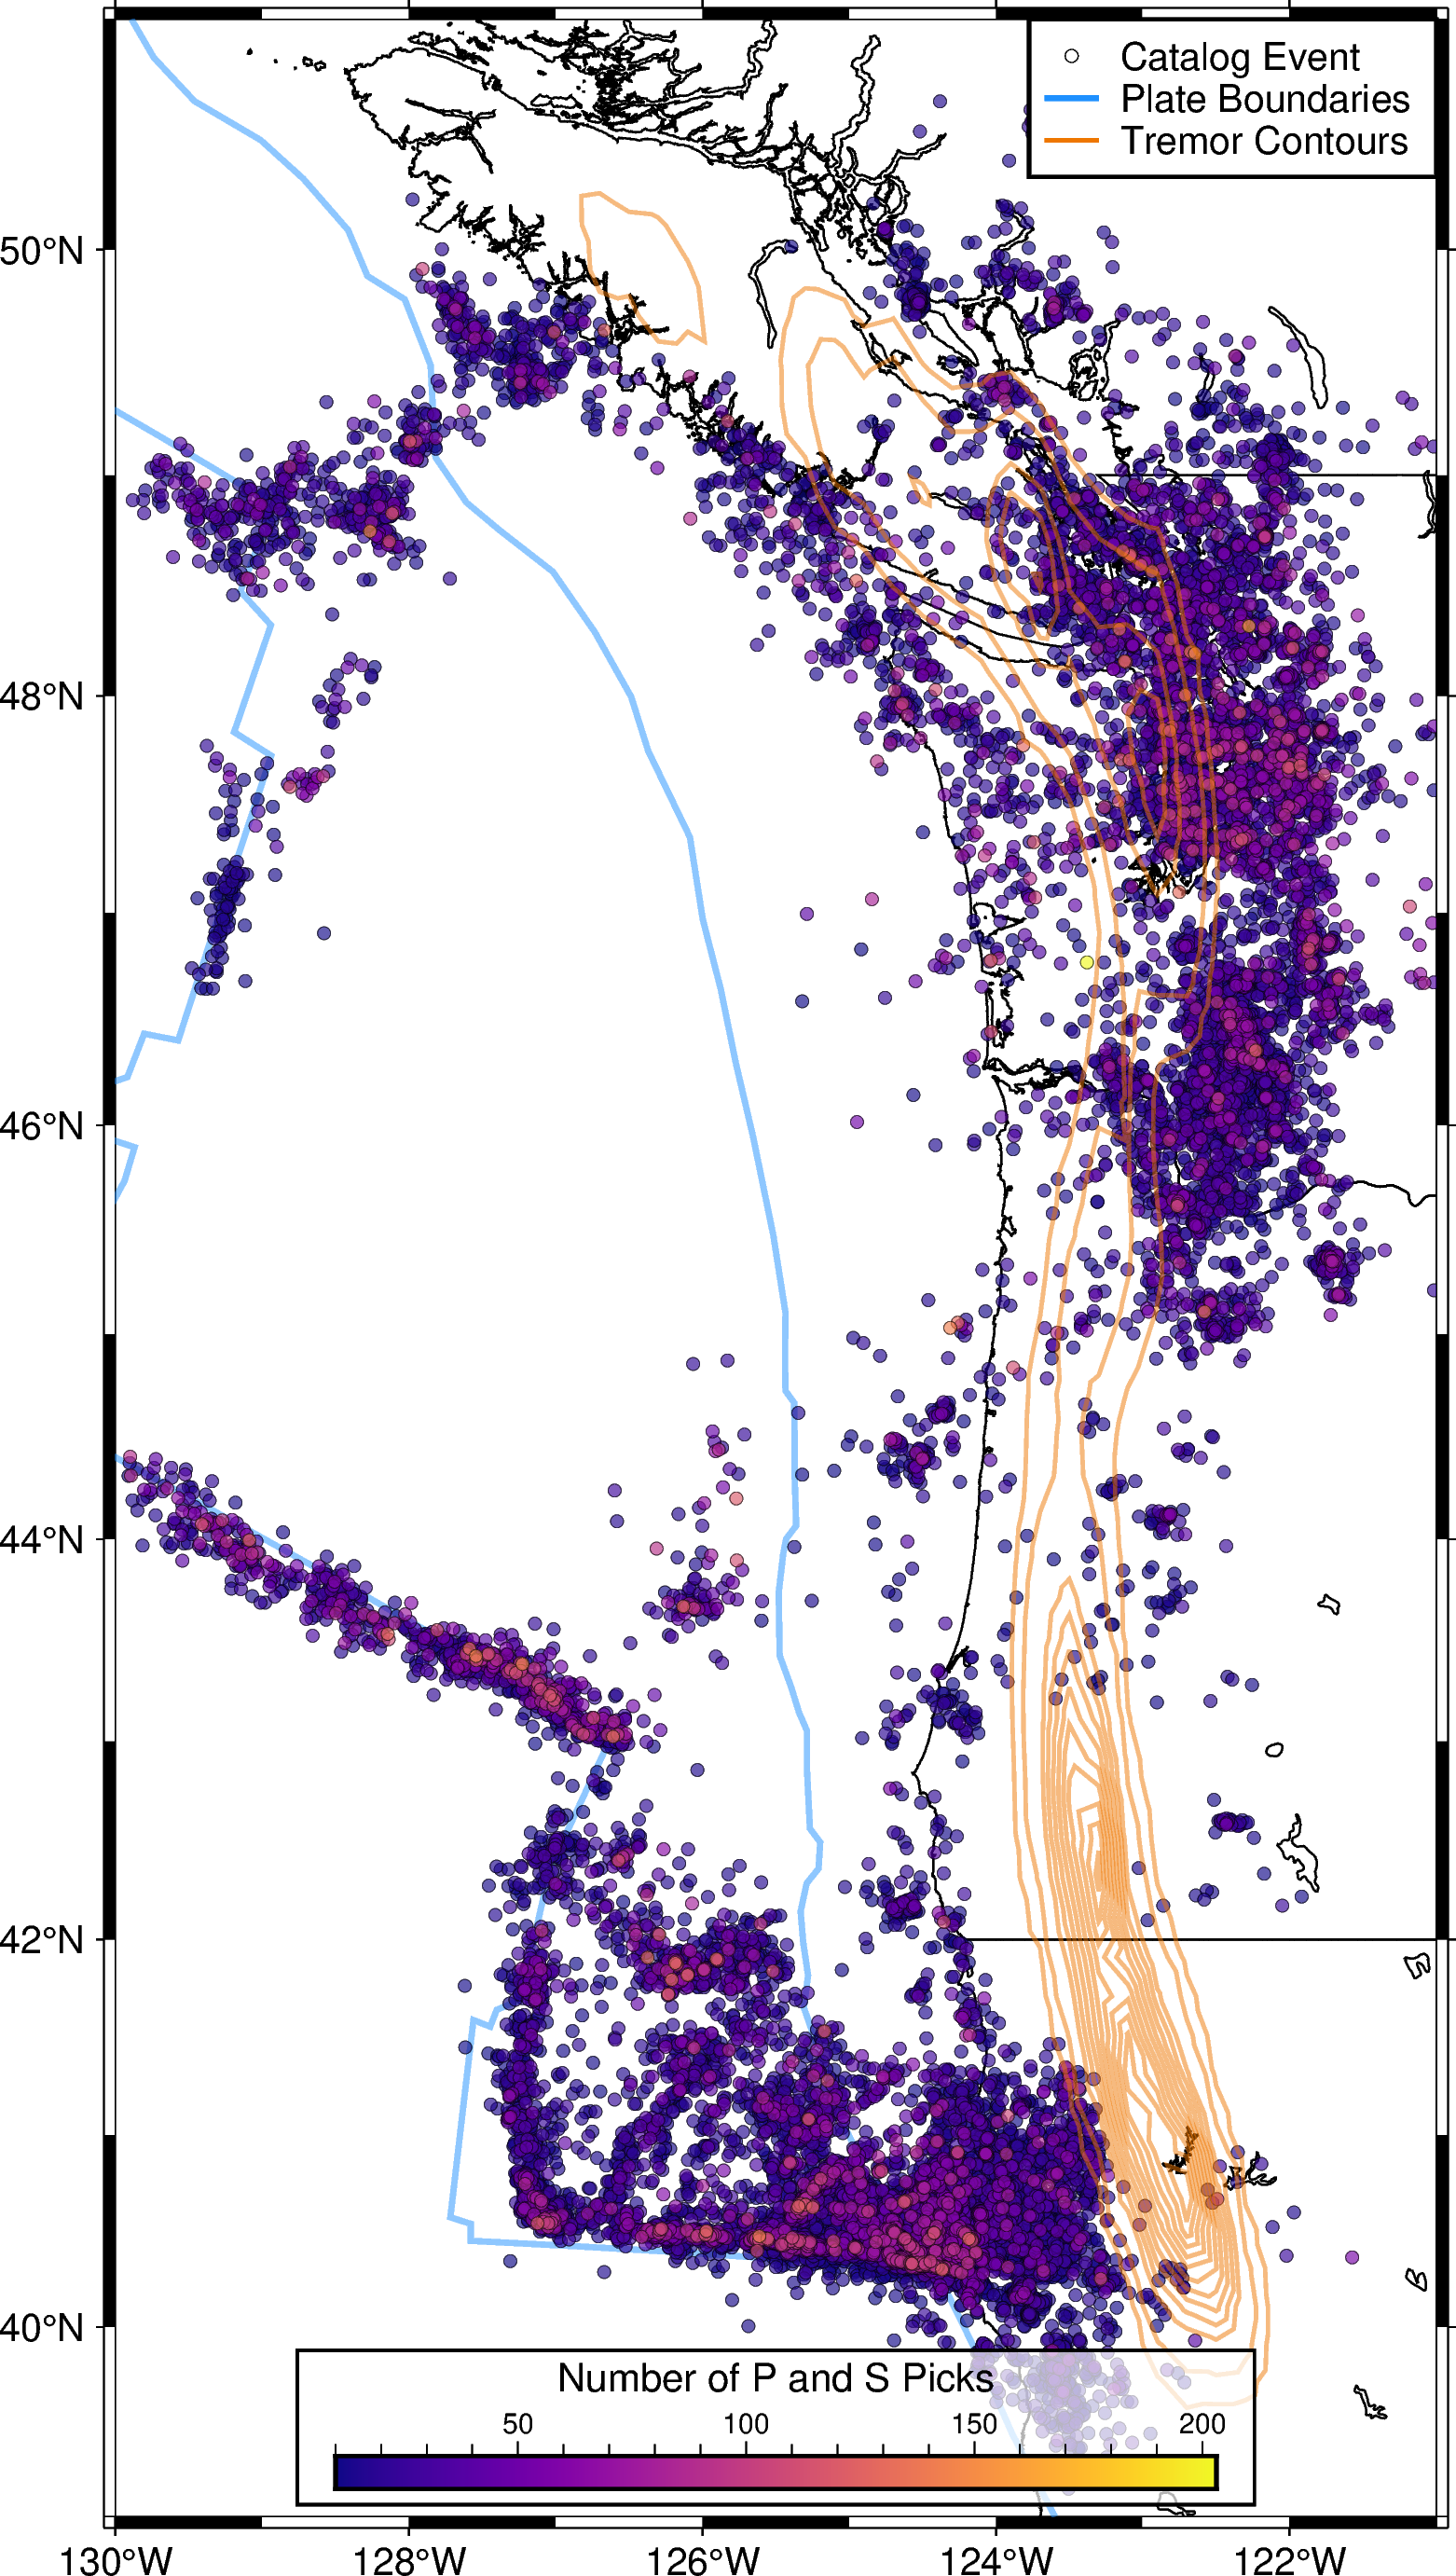

In [22]:


# Initialize the figure
fig = pygmt.Figure()

# Define target region
min_lat = 39
max_lat = 51
min_lon = -130
max_lon = -121

# Define the region to plot
region = [min_lon, max_lon, min_lat, max_lat]
title = ""


# Load grid data
# Set up the base map
fig.basemap(region=region, projection="M12c", frame="af")

# Plot the coastlines and political boundaries
fig.coast(region=region, projection="M12c", shorelines="0.5p,black", borders=["1/0.5p,black", "2/0.5p,black"], resolution="f")

# Add plate boundaries 
fig.plot(data="/wd1/hbito_data/data/datasets_all_regions/PB2002_boundaries.dig", pen="1.5p,dodgerblue1", transparency=50)



# Apply logarithmic scale for color mapping
# Apply log10 transformation to nass values and set color palette
nass_log_min = mycatalog['nass'].min()  # Add 1 to avoid log(0) error
nass_log_max = mycatalog['nass'].max()
pygmt.makecpt(cmap="plasma", series=[nass_log_min, nass_log_max])

# Plot the stations with the color map applied to the logarithm of "nass"
fig.plot(
    x=mycatalog["lon"],
    y=mycatalog["lat"],
    style="c0.12c",
    color=mycatalog["nass"],  # Apply log transformation for color mapping
    cmap=True,
    pen="0.1p,black",
    transparency=35
)


fig.contour(
    x=X.ravel(),
    y=Y.ravel(),
    z=Z.ravel(),
    levels='0.025,0.05,0.75,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325', pen='1.0p,darkorange2',transparency=50  # Contour levels
)

# Plot a dummy objects for the legend
fig.plot(x=[-110], y=[48], style="c0.12c", color="white", label="Catalog Event", pen="0.2p,black")

fig.plot(
        x=[mycatalog.iloc[0]['lon']+120, mycatalog.iloc[0]['lon']+120],
        y=[mycatalog.iloc[0]['lat']-30, mycatalog.iloc[0]['lat']-30],
        pen="1.5p,dodgerblue1",label='Plate Boundaries'
    )
fig.plot(
        x=[mycatalog.iloc[0]['lon']+120, mycatalog.iloc[0]['lon']+120],
        y=[mycatalog.iloc[0]['lat']-30, mycatalog.iloc[0]['lat']-30],
        pen='1.0p,darkorange2',label='Tremor Contours',transparency=50
    )
fig.text(
    x=-129.5, y=50.7, text=title,
    font="20p,Helvetica-Bold,black",
    no_clip=True    # This prevents the text from being clipped
)

# Add title text
fig.colorbar(
    position="jBC+o0.0c/0.25c+h+w8c/0.3c+ml",
    box="+gwhite@30+p0.8p,black",
    frame=["x+lNumber of P and S Picks"],
)

# Add the legend to the plot
fig.legend(position="JTR+w3.7+jTR", box='+gwhite+p1p')
# Save the figure
fig.savefig("/wd1/hbito_data/data/datasets_all_regions/filtered_events_2010_2015_ver3_cc_nass_no_relief_tremor_contours.png")

# Display the figure
fig.show()
